In [1]:
import mglearn as ml

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
x, y = ml.datasets.make_wave(n_samples=100)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(x_train, y_train)


(75, 1) (25, 1) (75,) (25,)


LinearRegression()

In [4]:
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.40443939]
lr.intercept_: -0.02256802817336538


In [5]:
print(f"Training score: {lr.score(x_train, y_train)}")
print(f"Test score: {lr.score(x_test, y_test)}")

Training score: 0.5932911361660249
Test score: 0.6599448011276341


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import mglearn as ml
import numpy as np 

import matplotlib.pyplot as plt

In [7]:
x, y = ml.datasets.load_extended_boston()

In [25]:
print(x.shape)
print(y.shape)

(506, 104)
(506,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(x_test)

residuals = y_test - y_pred

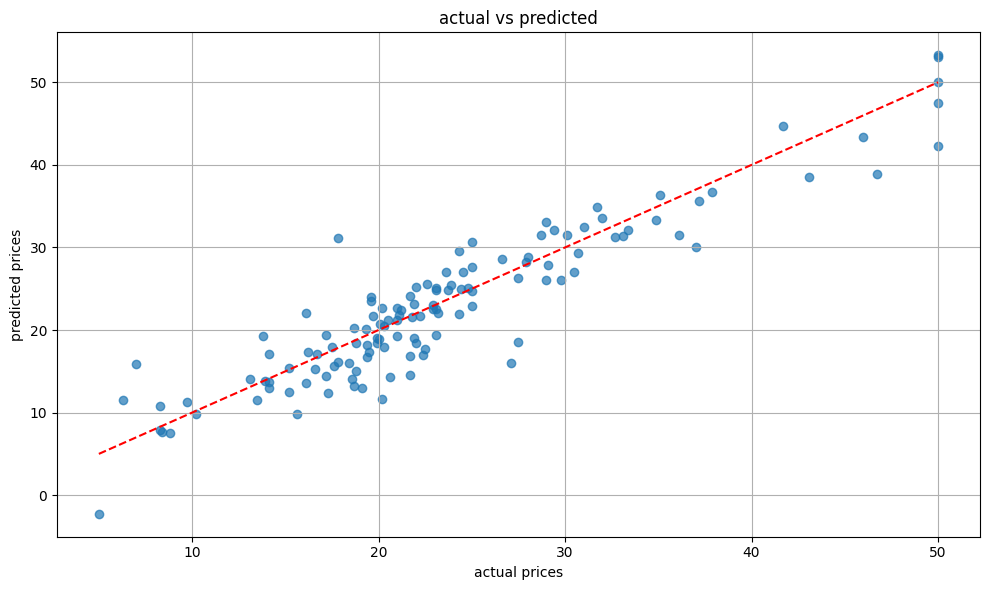

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("actual vs predicted")

plt.grid(True)
plt.tight_layout()
plt.show()

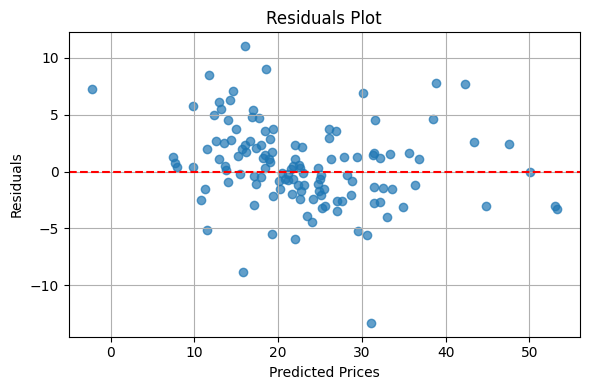

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

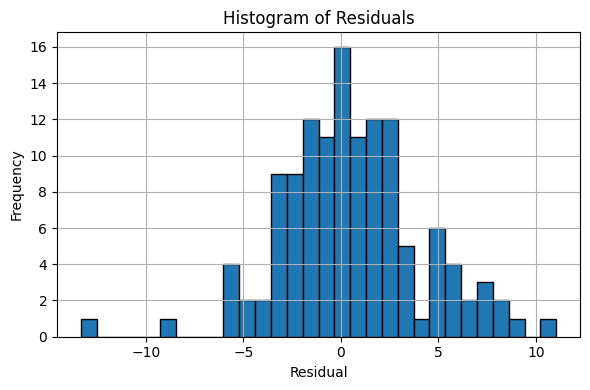

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {metrics.r2_score(y_test, y_pred):.2f}")

MAE: 2.73
MSE: 13.21
RMSE: 3.63
R² Score: 0.85


In [15]:
print(f'training score: {lr.score(x_train, y_train)}')
print(f'test score: {lr.score(x_test, y_test)}')

training score: 0.938413945640198
test score: 0.8499943941370321


In [16]:
from sklearn.linear_model import Ridge

In [17]:
ridge = Ridge()
ridge.fit(x_train, y_train)

print(f"Training score: {ridge.score(x_train, y_train)}")
print(f"Test score: {ridge.score(x_test, y_test)}")

Training score: 0.8535005299870096
Test score: 0.8712235267926789


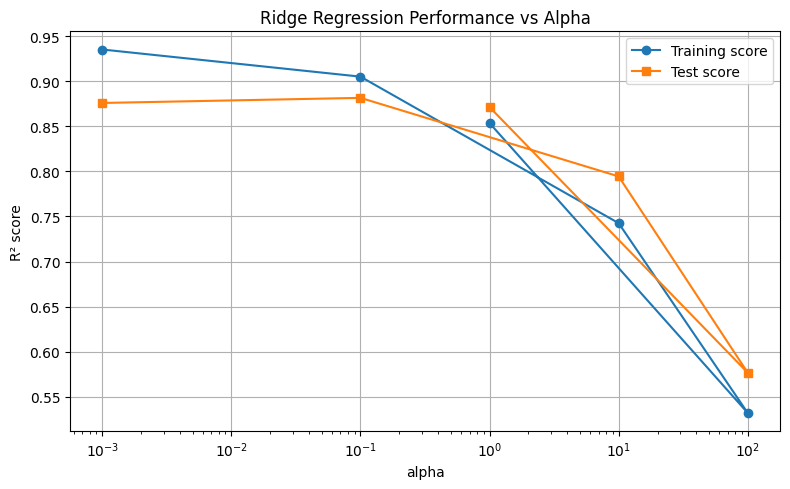

In [18]:
alphas = [0.001, 0.1, 10, 100, 1]

train_scores = []
test_scores = []
ridges = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridges.append(ridge)
    ridge.fit(x_train, y_train)
    train_scores.append(ridge.score(x_train, y_train))
    test_scores.append(ridge.score(x_test, y_test))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(alphas, train_scores, label="Training score", marker='o')
plt.plot(alphas, test_scores, label="Test score", marker='s')
plt.xscale("log") 
plt.xlabel("alpha")
plt.ylabel("R² score")
plt.title("Ridge Regression Performance vs Alpha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

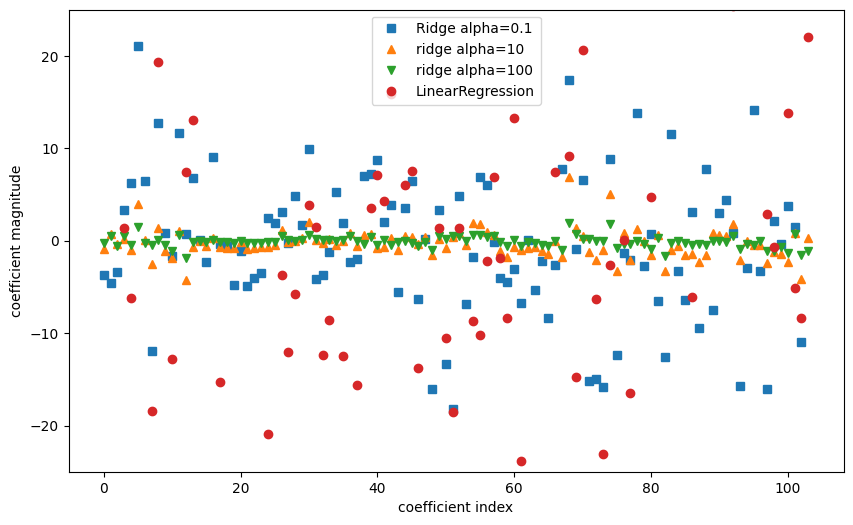

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(ridges[1].coef_, 's', label='Ridge alpha=0.1')
plt.plot(ridges[2].coef_, '^', label='ridge alpha=10')
plt.plot(ridges[3].coef_, 'v', label='ridge alpha=100')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-25, 25)
plt.legend()

In [20]:
from sklearn.linear_model import Lasso

In [21]:
lasso = Lasso().fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.24
Test set score: 0.21
Number of features used: 2


In [22]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.87
Test set score: 0.87
Number of features used: 35


In [23]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.94
Test set score: 0.87
Number of features used: 95


Text(0, 0.5, 'Coefficient magnitude')

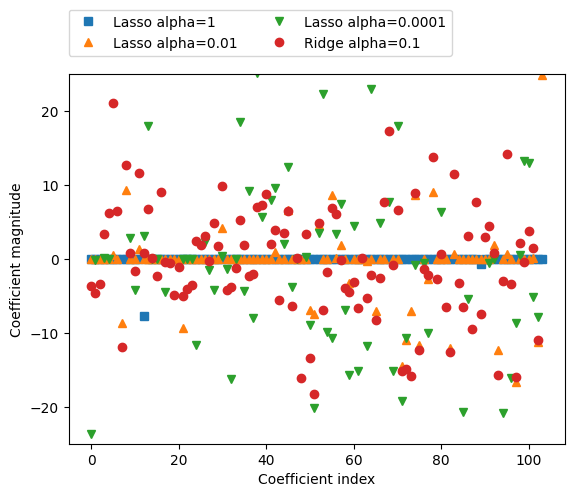

In [24]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridges[1].coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
